<a href="https://colab.research.google.com/github/AlexisD29/Field-Mapping/blob/main/Muon_g_2__Integration_Histogram_of_Stations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muon g-2 at ANL (Integration Histogram of Stations)

The following code below was created to generate the mean_difference of each of the 72 stations. Note: The mean _difference is the difference in the testing data of the 60 data points area(required data) and prediction data of each station. 

Four algorithms(regressors) are used to find which algortihm produce a better predictive model.This results in constructing four histograms that represent each algorthim which shows the distrubutions of the data.

Mounting the google drive helps with uploading the g-2 data faster.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # that's the location your drive will be mounted

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
df_fxp = pd.read_hdf("/content/drive/My Drive/SULI/run3989to3990.h5", key='raw')


In [ ]:
conversion_element = 1e-9 #Units are in seconds. The conversion is need to convert 
#the required and prediction data's absolute times from nanoseconds to seconds

Each regressor can be used in the following code below. To generate the code using one of the regressors, choose which regressor to uncomment and comment the other regressors. The default regressor that is uncomment currently is the Extra Trees Regressor.

In [ ]:

# Fitting with four different types of regression to the dataset 
# import the regressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

  

#Slicing the data is done to look at different regions of replacement across the whole dataset. 


#The shape gives the rows and columns of the dataframe and the number of rows in this dataframe is 14,589
number_of_total_datapoints = df_fxp.shape[0]
start_index = 0 
end_of_range = 700
sliced_end_data = 200
# start_index and sliced_end_data are used to place where to start and to stop in the dataset
#The end_of_range is used to not go out of bounds of the length of the dataframe

sliced_offset = 30 # The sliced offset is used to divide the total number of data points of the input data. 
#The sliced offset is set to 30 instead of 25 because, 30 will account for any outliners or extent from the 25-degree gap. 

total_gap = 300 # the trolley footprint gap in terms of seconds for 5 minutes(300s/300datapoints)
#We want to remove 1 min(the 60 required datapoints) to be left with 2 minutes(120 sec) on both sides of data
number_of_orangepoints = 60 #required data
seconds_gap = 120 # This is the 2 minutes that remains after the  1 min removal







blue_frequencies_slice = []
orange_frequencies_slice = []
# The left and right sidebands are called blue frequencies
# The 60 middle data points are called orange frequencies

blue_times_slice = []
orange_times_slice = []
#These are the absolute times corresponding to those frequencies

regression_list =[] # Stores number of regressor objects which is 72 regressors
prediction_list = [] # Stores the prediction data made from each station
Blue_X_test_list = [] # Stores the testing data from the blue frequenices(left and right sidebands)
mean_difference = [] # Stores the mean_difference of each station
Orange_Y_test_list =[] # Stores the testing data from the middle 60 datapoints

station = 0 # Start at station 0
stop = 72 # Stop at Station 71
step =93 # The step is 93 because there is a total of 93 slices for the testing data.

for station in range(station,stop):
  print('station#', station)
  reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
  #reg =  KNeighborsRegressor(n_neighbors=42)
  #reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
  #reg = MLPRegressor(random_state=42, max_iter=500)
  for end_index in range(0, number_of_total_datapoints - end_of_range, sliced_offset):
      
      blue_frequencies_slice.append(np.concatenate([df_fxp['st%i,m1'% station].values[end_index + start_index:end_index + sliced_end_data], df_fxp['st%i,m1'% station].values[total_gap+sliced_end_data+end_index:total_gap+end_index +start_index+(sliced_end_data)*2]]))
      
      orange_frequencies_slice.append(df_fxp['st%i,m1'% station].values[end_index +start_index+seconds_gap+sliced_end_data:end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints])
      
      blue_times_slice.append(np.concatenate(([df_fxp['st%i,m1'% station].index.astype('i8').values[end_index + start_index:end_index + sliced_end_data], df_fxp['st%i,m1'% station].index.astype('i8').values[total_gap+sliced_end_data+end_index:total_gap+end_index +start_index+(sliced_end_data)*2]]))*conversion_element)
      
      orange_times_slice.append((df_fxp['st%i,m1'% station].index.astype('i8').values[end_index +start_index+seconds_gap+sliced_end_data:end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints])*conversion_element)
 # The comments below can be uncomment to view the indices of each station

      #print("For the blue_times_slices:",end_index+start_index,end_index + sliced_end_data,total_gap+sliced_end_data+end_index, end_index+start_index+total_gap + sliced_end_data*2)
      #print("For the orange_times_slices:",end_index+start_index+seconds_gap+sliced_end_data,end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints)

  X = np.array(blue_frequencies_slice[station*step:station*step+step])
  Y = np.array(orange_frequencies_slice[station*step:station*step+step])
  Blue_X = X
  Orange_Y = Y

  Blue_X_train,Blue_X_test,Orange_Y_train,Orange_Y_test = train_test_split(Blue_X, Orange_Y,test_size=0.2,random_state = 42)
  reg.fit(Blue_X_train, Orange_Y_train)
  prediction= reg.predict(Blue_X_test)
  regression_list.append(reg)
  prediction_list.append(prediction)
  Orange_Y_test_list.append(Orange_Y_test)
  Blue_X_test_list.append(Blue_X_test)
  mean_difference.append((Orange_Y_test_list[station] - prediction_list[station]).mean())
  print(mean_difference)
  

X_times = np.array(blue_times_slice)
Y_times = np.array(orange_times_slice)

Blue_X_times = X_times
Orange_Y_times = Y_times

      



station# 0
[0.08518243660079877]
station# 1
[0.08518243660079877, -0.07586426995492315]
station# 2
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604]
station# 3
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712]
station# 4
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712, -0.09321273820141071]
station# 5
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712, -0.09321273820141071, -5.249647416119287]
station# 6
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712, -0.09321273820141071, -5.249647416119287, -4.74991416342408]
station# 7
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712, -0.09321273820141071, -5.249647416119287, -4.74991416342408, -5.210604980611255]
station# 8
[0.08518243660079877, -0.07586426995492315, 0.08780220702709604, -0.06494441388756712, -0.09321273820141071, -5.249647416119287, 

Run the code below to get the mean and standard deviation from the mean_difference. Note: Run each time after switching regressors.

In [ ]:
mean = np.array(mean_difference)
print("The mean of the mean_difference is:", round(mean.mean(), 3))
standard_deviation = np.array(mean_difference)
print("The standard deviation of the mean_difference is: ",round(standard_deviation.std(),3))


The mean of the mean_difference is: -0.379
The standard deviation of the mean_difference is:  1.529


Copy and paste the values of the mean and standard deviation into mu and sigma in the code below. Re-run to get the correct histogram.

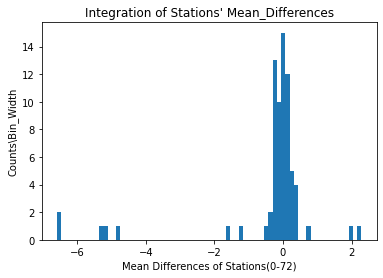

Standard Error of the Total Entries :  0.182
Mean of the Total Entries :  -0.379 Hz
Standard Deviation of the Total Entries :  1.529 Hz


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,stats


mu = -0.379 # mean of distribution
sigma = 1.529 # standard deviation of distribution


num_bins = 72

fig,ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(mean_difference, num_bins)

# plot normal probability density function
y = norm.pdf(bins, mu, sigma)
plt.xlabel('Mean Differences of Stations(0-72)')
plt.ylabel('Counts\Bin_Width')
plt.title("Integration of Stations' Mean_Differences")
plt.show()

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

standard_error = stats.sem(mean_difference)

print("Standard Error of the Total Entries : ", round(standard_error,3))
print("Mean of the Total Entries : ", round(mu,3),'Hz')
print("Standard Deviation of the Total Entries : ", round(sigma,3),'Hz')
Converted_OYT = np.array(Orange_Y_test_list)
Converted_prediction = np.array(prediction_list)